In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [3]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df.drop(['Id', 'SalePrice'], axis=1))
categorical_columns = categorical_columns_selector(houses_df)

print(numerical_columns)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

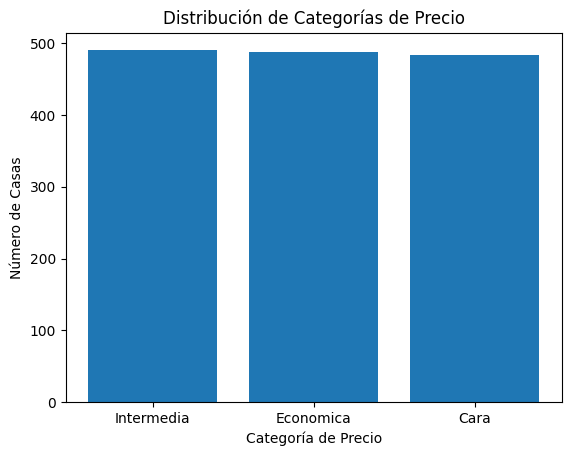

In [5]:
# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

In [6]:
target = houses_df.pop('Precio_Categoria')
data = houses_df.drop(['Id', 'SalePrice'], axis=1)

In [7]:
random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)